# EECS 4312 Course Project

## Name: Vincent Mai
## Student Number : 217990136
## Date: March 28, 2024

# TASK 1: GATHERING REVIEWS

Using an existing web scraper provided in the Course Project document (https://github.com/JoMingyu/google-play-scraper), the Google Play Store reviews of the SUD, competitor, and similar apps can be retrieved for further analysis.


Note: Because the SUD currently has no reviews to retrieve, we can turn to the similar and competitor apps that were identified in Lab Submission 1 and extract their reviews.

SUD:
*   Groestlcoin Wallet: https://play.google.com/store/apps/details?id=hashengineering.groestlcoin.wallet&hl=en_CA&gl=US

Similar Apps:
*   MetaMask - Blockchain Wallet: https://play.google.com/store/apps/details?id=io.metamask&pcampaignid=web_share

*   Exodus: Crypto Bitcoin Wallet:
https://play.google.com/store/apps/details?id=exodusmovement.exodus&pcampaignid=web_share

Competitor Apps:
*   Infinitum Wallet:
https://play.google.com/store/apps/details?id=com.bitcoinnano.infinitum&pcampaignid=web_share

*   Payperless Crypto & BTC Wallet:
https://play.google.com/store/apps/details?id=com.payperless.wallet&pcampaignid=web_share

## Part I: Create CSV File

Create a CSV file with these header <Package name, Reviewer name, Review,
Rating>.

In [1]:
pip install google-play-scraper

In [2]:
from google_play_scraper import Sort, reviews, reviews_all
import csv

# Used to remove warning about pandas.append and pandas.concat
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Filename for the csv file
csv_filename = "hashengineering.groestlcoin.wallet.csv"

# Initialize (Create) the csv file
headers = ["Package Name", "Reviewer Name", "Review", "Rating"]

with open(csv_filename, "w") as csvfile:

  writer = csv.DictWriter(csvfile, fieldnames=headers)
  writer.writeheader()

## Part II and III: Scrape Reviews From The Google Play Store and Write To CSV File

Crawl/Scrape reviews from app store and parse them to extract the names of reviewers, their review, and their rating.

In [3]:
# Write reviews to csv file
def write_to_csv(app_reviews, package_name):

  with open(csv_filename, "a") as csvfile:

    writer = csv.DictWriter(csvfile, fieldnames=headers)

    for review in app_reviews:
      userName = review["userName"]
      review_description = review["content"]
      rating = review["score"]

      writer.writerow({"Package Name" : package_name, "Reviewer Name" : userName, "Review" : review_description, "Rating" : rating})

# Gathering Reviews for Task 1

# Function that web scrapes reviews from the google play store
# Source code: https://github.com/JoMingyu/google-play-scraper
def get_reviews(package_name):

  all_reviews = reviews_all(
    f"{package_name}",
    sleep_milliseconds=0, # defaults to 0
    lang="en", # defaults to 'en'
    country="us", # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    filter_score_with=None # defaults to None(means all score)
  )

  return all_reviews

## Note regarding the reviews collected in Task 1

As mentioned above, the SUD has no reviews listed in the Google Play Store, thus no reviews have been collected.

For one of the competitor apps, Infinitum Wallet, there was only one review with a comment, but it was not in English, thus not collecting reviews from this app.

Finally, the second competitor app did have some reviews on the Google Play Store, but I was unexpectedly not able to gather this data through my code on Google Colab. The exact code included in this documented was tested in another environment (PyCharm), and it **was** able to gather this data.

**Hence, the only reviews that were collected were from the two similar apps: MetaMask and Exodus.**

The coments in the code snippet below represents what the code would be if all 5 apps (1 SUD and 2 competitor apps) had reviews with comments to web scrape.

In [4]:
# ***Note: SUD (Groestlcoin did not have reviews, nothing to webscrape)***

# Retrieve Infinitum Wallet App Reviews
# comp_app1 = get_reviews("hashengineering.groestlcoin.wallet")
# write_to_csv(comp_app1, "hashengineering.groestlcoin.wallet")


# Retrieve MetaMask - Blockchain Wallet App Reviews
similar_app1 = get_reviews("io.metamask")
write_to_csv(similar_app1, "io.metamask")

# Retrieve Exodus: Crypto Bitcoin Wallet App Reviews
similar_app2 = get_reviews("exodusmovement.exodus")
write_to_csv(similar_app2, "exodusmovement.exodus")

# ***Note: Infinitum's reviews do not have comments, cannot webscrape***

# Retrieve Infinitum Wallet App Reviews
# comp_app1 = get_reviews("com.bitcoinnano.infinitum")
# write_to_csv(comp_app1, "com.bitcoinnano.infinitum")

# ***Note: Was able to get the reviews when copying and running this code in Pycharm, but could not get it running in Google Colab***

# Retrieve Payperless Crypto & BTC Wallet App Reviews
# comp_app2 = get_reviews("com.payperless.wallet")
# write_to_csv(comp_app2, "com.payperless.wallet")

# TASK 2: PREPROCESSING TEXT

To preprocess the reviews, these steps can be taken:

The steps include:
1. Remove punctuations
2. Remove special characters and emojis
3. Turn numbers into text
4. Remove extra white spaces
5. Turn all words into lowercase
6. Remove stop words
7. Lemmatize the reviews
8. Output 15 sample pre-processed reviews in your notebook

In [5]:
pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=e21ef03ffa1e2c9f461f6e8cbbe808f7e51b6bae8bb85250523ca98a2cb49c6c
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [6]:
pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1cbacf28eedef58ba4c1c367fa7ae37a603b799751e2fb7c8fb433265ae081b9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [7]:
import re
import pandas
import nltk
import num2words
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from cleantext import clean

nltk.download("stopwords")
nltk.download('wordnet')
stop_words = set(stopwords.words("english"))

# Preprocessing reviews for Task 2
def preprocess_reviews(reviews):

  # 1. Remove punctuation
  reviews = re.sub(r"[^\w\s]","", reviews)

  # 2. Remove special characters and emojis
  reviews = re.sub("[^A-Za-z0-9 ]+", "", reviews)
  reviews = clean(reviews, no_emoji=True)

  # 3. Turn numbers into text
  split_words = reviews.split()
  word_list = []

  for word in split_words:
    if word.isdigit():
      word_list.append(num2words.num2words(word))
    else:
      word_list.append(word)

  reviews = " ".join(word_list)

  # 4. Remove extra white spaces
  reviews = re.sub(" +", " ", reviews)

  # 5. Turn all words into lowercase
  reviews = reviews.lower()

  # 6. Remove stop words
  split_words = reviews.split()
  word_list = []

  for word in split_words:
    if word not in stop_words:
      word_list.append(word)

  reviews = " ".join(word_list)

  # 7. Lemmatize the reviews
  split_words = reviews.split()
  word_list = []

  for word in split_words:
    if word not in stop_words:
      word_list.append(WordNetLemmatizer().lemmatize(word))

  reviews = " ".join(word_list)

  return reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
# Read csv file
csv_file = pandas.read_csv(csv_filename)

# Apply preprocessing to all reviews gathered in Task 1
reviews_column = csv_file["Review"]
reviews_column = reviews_column.apply(preprocess_reviews)

# COPY existing data a duplicate csv file, and update reviews with the processed reviews to obtain an
# intermediate set of preprocessed reviews
csv_file_processed_reviews = csv_file
csv_file_processed_reviews["Review"] = reviews_column

Below is the intermediate set of preprocessed reviews that will be used in the remaining tasks:

In [9]:
display(csv_file_processed_reviews)

,Package Name,Reviewer Name,Review,Rating
0,io.metamask,HM Shakib Al-Hasan,great wallet,5
1,io.metamask,Sinha Sarkar,metamask shollow chole kam kore na,5
2,io.metamask,cletus umoh,good,5
3,io.metamask,Umar Yusif,wow,5
4,io.metamask,victor osafele,great app,5
...,...,...,...,...
2582,exodusmovement.exodus,SHAIKH JUNAID,wallet best example self custody always standa...,5
2583,exodusmovement.exodus,Memphis Rio,great wallet love interface,5
2584,exodusmovement.exodus,hamid nikson,tried generate usdt trc20 never happened waiti...,1
2585,exodusmovement.exodus,Roger Stewart,smith butter love app,5


Below is a sample of 15 reviews after being pre-processed in Task 2:

In [10]:
# 8. Output first 15 pre-processed reviews
csv_file_processed_reviews.sample(15)


,Package Name,Reviewer Name,Review,Rating
2131,exodusmovement.exodus,Olayinka “Olaytee” Thompson,good easy use,4
1005,exodusmovement.exodus,Michael Camacho,easiest wallet web3 integration seamless,5
2113,exodusmovement.exodus,Emmanuel M,hello add option save crypto address contact l...,3
767,io.metamask,Akash Bansode,nice biockchain,5
118,io.metamask,Santosh Kumar,good,3
2081,exodusmovement.exodus,Abdul Karim mudede,reliable safe,5
1460,exodusmovement.exodus,Joao Costa,top app crypto wallet,5
444,io.metamask,jay cee,working,1
619,io.metamask,Md Milon,nic app,5
2160,exodusmovement.exodus,Samuel Daniel,rate app zero fee exorbitanti cost swaphigh ra...,1


# TASK 3: SENTIMENT ANALYSIS

## Part I: TextBlob Reviews Sentiment Analysis

In [11]:
# Textblob Reviews Sentiment
from textblob import TextBlob

def textblob_analysis(csv_file):

  polarity_list = []

  for review in csv_file["Review"]:
    polarity_value = TextBlob(review).sentiment.polarity
    polarity_list.append(polarity_value)

  data = {
      "App Package Name" : csv_file["Package Name"],
      "Review" : csv_file["Review"],
      "Polarity" : polarity_list
  }

  textblob_analysis =  pandas.DataFrame(data)

  return textblob_analysis

In [12]:
# Textblob Sentiment Analysis for Similar App 1 (MetaMask)
similar_app1_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "io.metamask"]
textblob_table_similar_app1 = textblob_analysis(similar_app1_processed_reviews)

# Outputs a table that displays the polarity of each review in Similar App 1 (MetaMask)
display(textblob_table_similar_app1)


# Textblob Sentiment Analysis for Similar App 2 (Exodus)
similar_app2_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "exodusmovement.exodus"]
textblob_table_similar_app2 = textblob_analysis(similar_app2_processed_reviews)

# Outputs a table that displays the polarity of each review in Similar App 2 (Exodus)
display(textblob_table_similar_app2)


# In the event that the SUD and two competitor apps did have reviews AND the SUD had reviews, this is the code below:

# # Textblob Sentiment Analysis for SUD (Groestlcoin)
# sud_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "hashengineering.groestlcoin.wallet"]
# textblob_table_sud = textblob_analysis(sud_processed_reviews)

# # Outputs a table that displays the polarity of each review in SUD (Groestlcoin)
# display(textblob_table_sud)


# # Textblob Sentiment Analysis for Competitor App 1 (Infinitum)
# comp_app1_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "com.bitcoinnano.infinitum"]
# textblob_table_comp_app1 = textblob_analysis(similar_app1_processed_reviews)

# # Outputs a table that displays the polarity of each review in Competitor App 1 (Infinitum)
# display(textblob_table_comp_app1)


# # Textblob Sentiment Analysis for Competitor App 2 (Payperless)
# comp_app2_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "com.payperless.wallet"]
# textblob_table_comp_app2 = textblob_analysis(comp_app2_processed_reviews)

# # Outputs a table that displays the polarity of each review in Competitor App 2 (Payperless)
# display(textblob_table_comp_app2)

,App Package Name,Review,Polarity
0,io.metamask,great wallet,0.800000
1,io.metamask,metamask shollow chole kam kore na,0.000000
2,io.metamask,good,0.700000
3,io.metamask,wow,0.100000
4,io.metamask,great app,0.800000
...,...,...,...
791,io.metamask,greatest,1.000000
792,io.metamask,smooth wallet easy work,0.416667
793,io.metamask,buggy hugely frustrating,-0.400000
794,io.metamask,awesome,1.000000


,App Package Name,Review,Polarity
796,exodusmovement.exodus,love,0.500000
797,exodusmovement.exodus,good perfect,0.850000
798,exodusmovement.exodus,best wallet,1.000000
799,exodusmovement.exodus,support bsv,0.000000
800,exodusmovement.exodus,im someone purchase bitcoin every day sometime...,-0.059722
...,...,...,...
2582,exodusmovement.exodus,wallet best example self custody always standa...,0.500000
2583,exodusmovement.exodus,great wallet love interface,0.650000
2584,exodusmovement.exodus,tried generate usdt trc20 never happened waiti...,0.000000
2585,exodusmovement.exodus,smith butter love app,0.500000


## Part II: Vader Reviews Sentiment Analysis

In [13]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [14]:
# Vader Reviews Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader_analysis(csv_file):

  polarity_list = []
  vader_analyzer = SentimentIntensityAnalyzer()

  for review in csv_file["Review"]:
    polarity_value =  vader_analyzer.polarity_scores(review)["compound"]
    polarity_list.append(polarity_value)

  data = {
      "App Package Name" : csv_file["Package Name"],
      "Review" : csv_file["Review"],
      "Polarity" : polarity_list
  }

  vader_analysis =  pandas.DataFrame(data)

  return vader_analysis

In [15]:
# Vader Sentiment Analysis for Similar App 1 (MetaMask)
similar_app1_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "io.metamask"]
vader_table_similar_app1 = vader_analysis(similar_app1_processed_reviews)

# Outputs a table that displays the polarity of each review in Similar App 1 (MetaMask)
display(vader_table_similar_app1)


# Vader Sentiment Analysis for Similar App 2 (Exodus)
similar_app2_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "exodusmovement.exodus"]
vader_table_similar_app2 = vader_analysis(similar_app2_processed_reviews)

# Outputs a table that displays the polarity of each review in Similar App 2 (Exodus)
display(vader_table_similar_app2)


# In the event that the SUD and two competitor apps did have reviews, this is the code below:

# # Vader Sentiment Analysis for Competitor App 1 (Infinitum)
# comp_app1_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "com.bitcoinnano.infinitum"]
# vader_table_comp_app1 = vader_analysis(comp_app1_processed_reviews)

# # Outputs a table that displays the polarity of each review in Competitor App 1 (Infinitum)
# display(vader_table_comp_app1)


# # Vader Sentiment Analysis for Competitor App 2 (Payperless)
# comp_app2_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "com.payperless.wallet"]
# vader_table_comp_app2 = vader_analysis(comp_app2_processed_reviews)

# # Outputs a table that displays the polarity of each review in Competitor App 2 (Payperless)
# display(vader_table_comp_app2)

,App Package Name,Review,Polarity
0,io.metamask,great wallet,0.6249
1,io.metamask,metamask shollow chole kam kore na,0.0000
2,io.metamask,good,0.4404
3,io.metamask,wow,0.5859
4,io.metamask,great app,0.6249
...,...,...,...
791,io.metamask,greatest,0.6369
792,io.metamask,smooth wallet easy work,0.4404
793,io.metamask,buggy hugely frustrating,-0.4927
794,io.metamask,awesome,0.6249


,App Package Name,Review,Polarity
796,exodusmovement.exodus,love,0.6369
797,exodusmovement.exodus,good perfect,0.7650
798,exodusmovement.exodus,best wallet,0.6369
799,exodusmovement.exodus,support bsv,0.4019
800,exodusmovement.exodus,im someone purchase bitcoin every day sometime...,0.1280
...,...,...,...
2582,exodusmovement.exodus,wallet best example self custody always standa...,0.7717
2583,exodusmovement.exodus,great wallet love interface,0.8519
2584,exodusmovement.exodus,tried generate usdt trc20 never happened waiti...,0.0000
2585,exodusmovement.exodus,smith butter love app,0.6369


## Part III: Comparing Polarity Values From TextBlob and Vader

In [16]:
from matplotlib import pyplot as plt

# Function that creates 2 histogram graphs to compare the polarity values found using the Textblob and Vader tools
def polarity_histogram(textblob_table, vader_table, app_name):

  # TextBlob Polarity Plot

  plt.subplot(1, 2, 1)
  textblob_table["Polarity"].plot(kind="hist", bins=20, title=f"{app_name} TextBlob Polarity")
  plt.gca().spines[["top", "right",]].set_visible(False)

  # Vader Polarity Plot

  plt.subplot(1, 2, 2)
  vader_table["Polarity"].plot(kind="hist", bins=20, title=f"{app_name} Vader Polarity")
  plt.gca().spines[["top", "right",]].set_visible(False)



### MetaMask

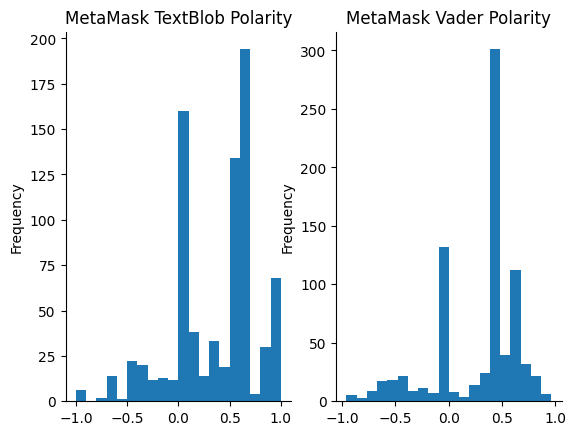

In [17]:
# Retrieve all reviews from the first similar app (MetaMask)

# Reviews including polarity found using TextBlob
metamask_table_reviews_textblob = textblob_table_similar_app1[textblob_table_similar_app1["App Package Name"] == "io.metamask"]

# Reviews including polarity found using Vader
metamask_table_reviews_vader = vader_table_similar_app1[vader_table_similar_app1["App Package Name"] == "io.metamask"]

# Output histogram graph to compare polarity values between TextBlob and Exodus
polarity_histogram(metamask_table_reviews_textblob, metamask_table_reviews_vader, "MetaMask")

### Exodus

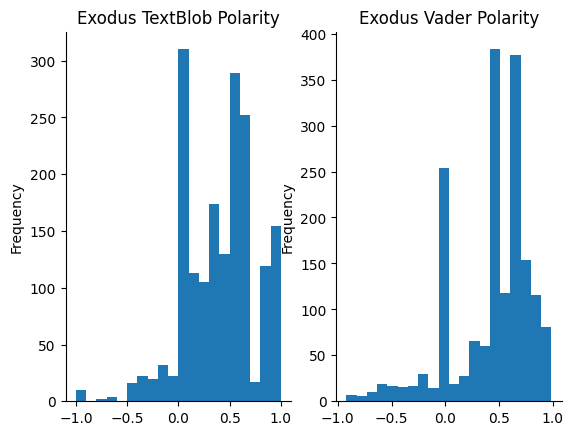

In [18]:
# Retrieve all reviews from the second similar app (Exodus)

# Reviews including polarity found using TextBlob
exodus_table_reviews_textblob = textblob_table_similar_app2[textblob_table_similar_app2["App Package Name"] == "exodusmovement.exodus"]

# Reviews including polarity found using Vader
exodus_table_reviews_vader = vader_table_similar_app2[vader_table_similar_app2["App Package Name"] == "exodusmovement.exodus"]

# Output histogram graph to compare polarity values between TextBlob and Exodus
polarity_histogram(exodus_table_reviews_textblob, exodus_table_reviews_vader, "Exodus")

### Part IV

How does the sentiments retrieved by Textblob and Vader compare with each
other? How do they compare with the rating of the app? How do you interpret the
similarities/differences?

## Part IV: Sentiment Evaluation Using ChatGPT

In [19]:
processed_reviews = csv_file["Review"].tolist()

# This output can be used to input into ChatGPT to complete a sentiment analysis
print(processed_reviews)

['great wallet', 'metamask shollow chole kam kore na', 'good', 'wow', 'great app', 'gud work application', 'nice', 'nice', 'app unresponsive take time load stuff', 'good application easy use awesome metamask user need verify account going give star convenience user im getting really good every time try open eth network first account automatically responds quickly best crypto wallet ever', 'wow', 'app slow take time load', 'app incredibly slow device running exynos processers recommend user wanting instant trading', 'perfect', 'easy use beginner friendly', 'wish option choose le one star think updating app make better previous metamask different cant even enter app updated waist wallet', 'nice one', 'like app', 'nice', 'metamask best', 'nice', 'metamask really frustrating downloaded app asking create new wallet import existing wallet never go beyond data usage page agree button never responding click able like day even updating app annoying', 'ever green', 'cannot type anything', 'reall

### a) What prompt would you use?

This prompt that was used on ChatGPT 3.5 was:

"Can you complete a sentiment analysis with this list of data: (inserted the list output of processed_reviews from the code above)"

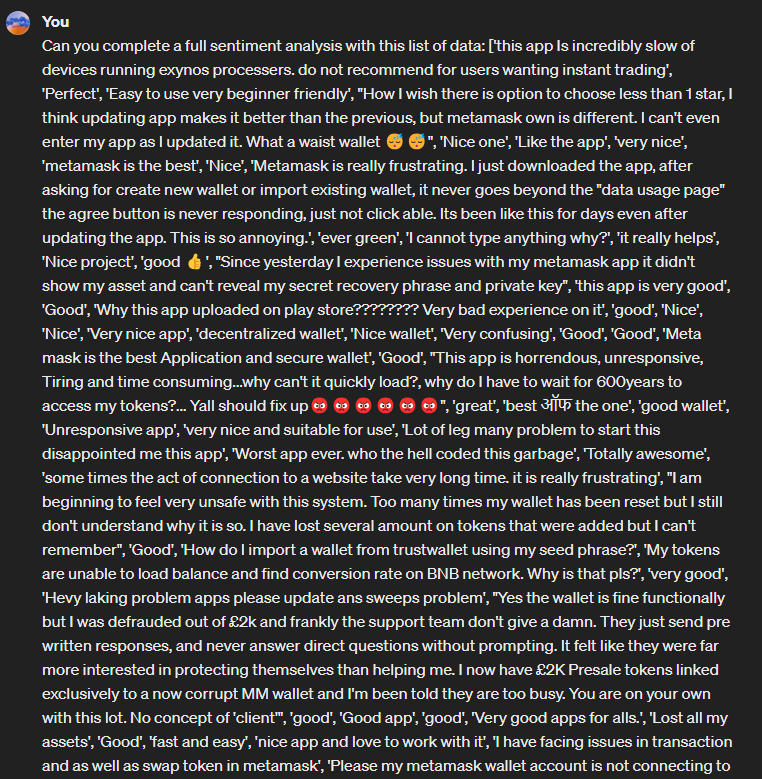

Once this was inputted, the response that was given was for each review, it was listed as positive,negative, or netural, and was also given a sentence giving insight on what the review discusses.

Example:

* Original Review: "this app Is incredibly slow of devices running exynos
processers. do not recommend for users wanting instant trading"

* Output for that Review: Negative sentiment: "this app Is incredibly slow of devices running exynos processors. do not recommend for users wanting instant trading" - Negative sentiment, highlighting slow performance.

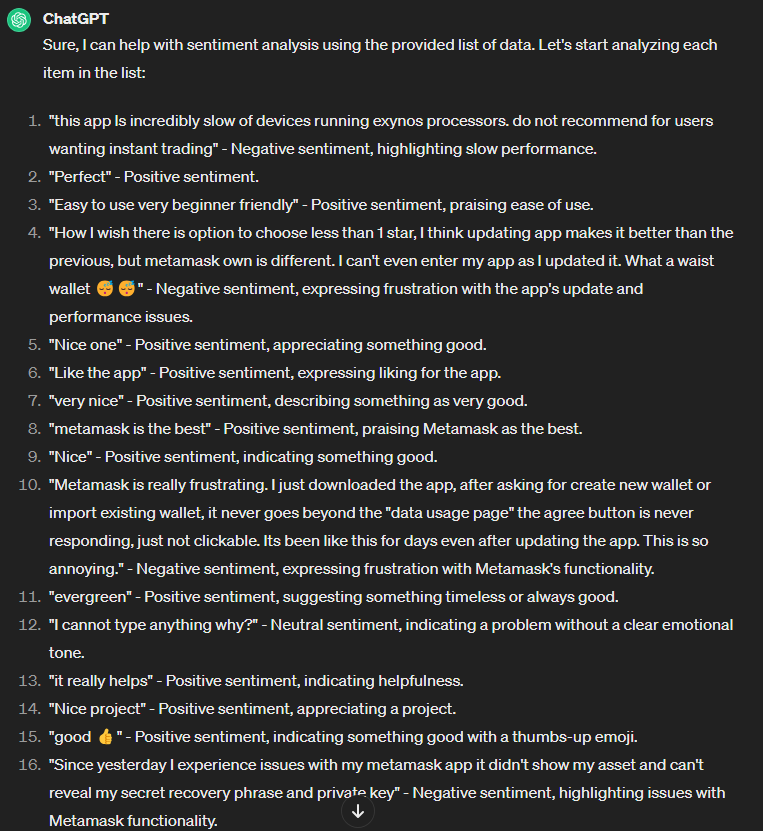

At the bottom of the reponse, it gave a summary on the sentiment analysis that the model did.

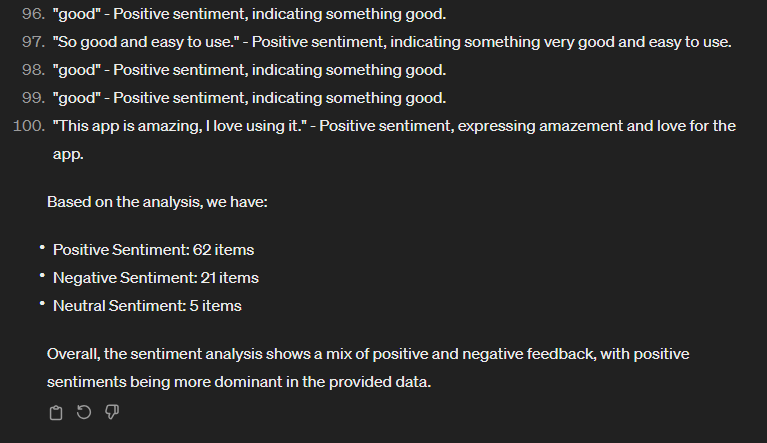

## b) How does the sentiment returned by GPT model compares with Textblob results? Create tables and compare.

The sentiment that was returned by the GPT model was much more simple and vague, as it only stated if it was a positive, negative, or neutral sentiment, as well as slight insight on what the review is referring to. When comparing to Textblob's results, the sentiment analysis that Textblob outputted is much more detailed, as it outputs a polarity between -1 and +1, creating a better analysis on where it lies within the positive and negative spectrum. The first image below is a previous sample output that the Textblob sentiment analysis did in Task 3 Part I, and the second image is the histogram for the reviews from MetaMask using the Textblob analysis. The third image is the output of the GPT model, and both analyses used the exact same input of reviews. We can see that the polarity the Textblob Sentiment Analysis found is much more detailed than what the GPT model outputted. We are also able to create a histogram to represent the frequency of different polarity values, furthering giving more insight on the reviews.

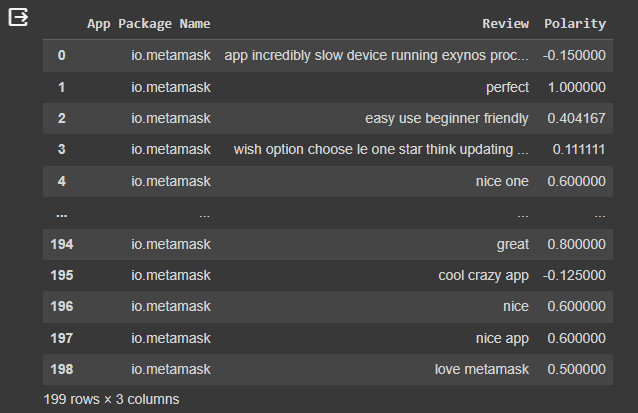

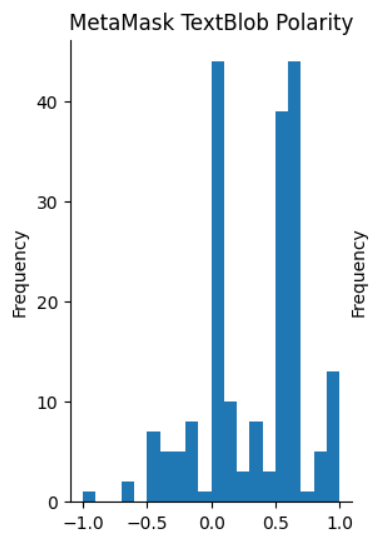

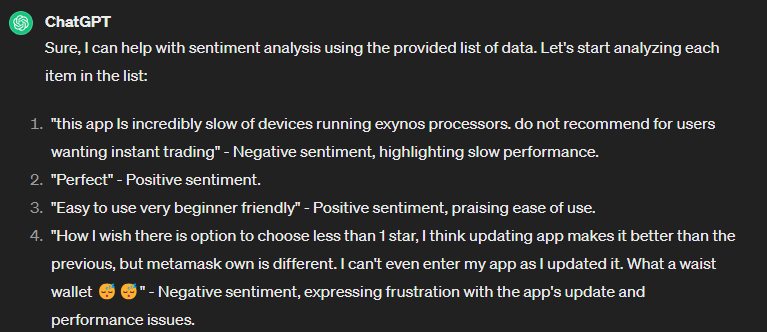

## c) How does the sentiment returned by GPT model compares with Vader results? Create tables and compare.

Similarly to the Textblob analysis, the Vader Sentiment analysis also output a polarity value to each review between +1 and -1, indicating how positive or how negative the review is. Again, the GPT model's output is very vague when comparing it to Vader's output. The first image below is a previous sample output that the Vader sentiment analysis did in Task 3 Part II, and the second image is the histogram for the reviews from MetaMask using the Vader analysis. The third image is the output of the GPT model, and both analyses used the exact same input of reviews. We can see that the polarity the the Vader Sentiment Analysis did is much more detailed than what the GPT model outputted. We are also able to create a histogram to represent the frequency of different polarity values, furthering giving more insight on the reviews.

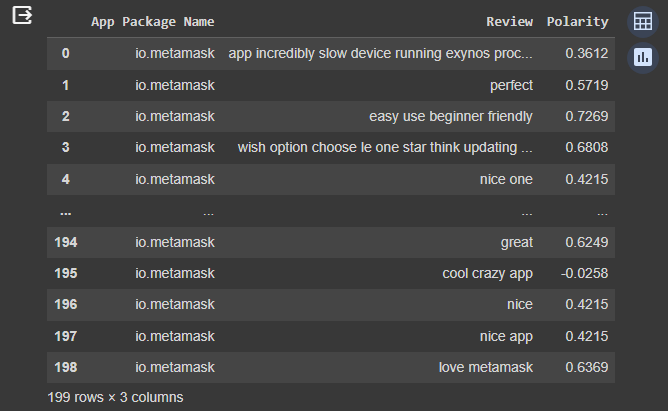

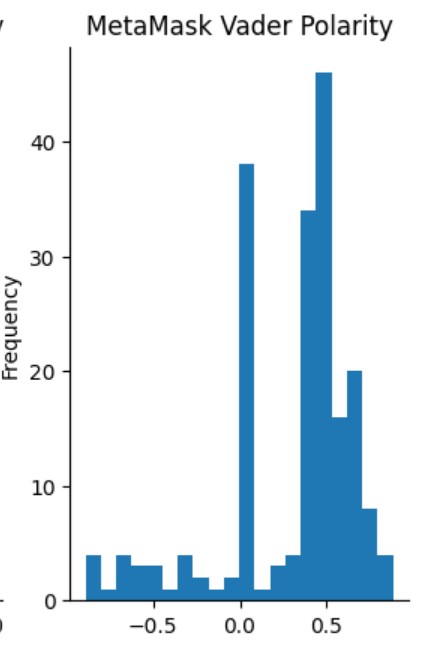

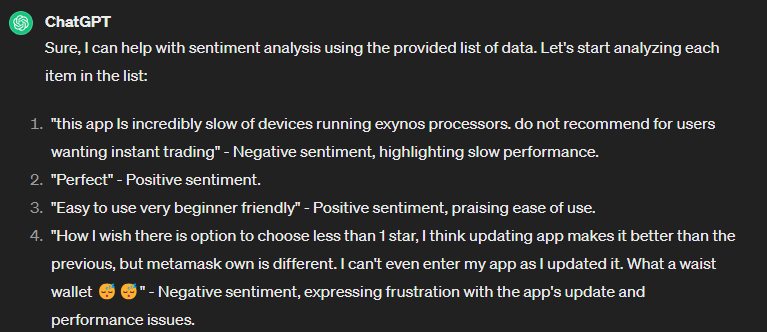

# TASK 4: TOPIC MODELING Using LDA

## Part I.

Across all the reviews of all of the apps (SUD + similar/competitor), extract
15 LDA topics, each being described by at least 7 Words.

In [20]:
from gensim import corpora, models

# Convert Reviews in csv column to a list
reviews_list = []

for review in csv_file_processed_reviews["Review"].tolist():
  reviews_list.append(review.split())

dictionary = corpora.Dictionary(reviews_list)

bow_corpus = []

for text in reviews_list:
  bow_corpus.append(dictionary.doc2bow(text))

# Initialize the model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

num_lda_topics = 15

# Initializa LDA transformer
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=num_lda_topics)
corpus_lda = lda_model[corpus_tfidf]
topics_list = lda_model.print_topics(num_topics=15, num_words=7)

In [21]:
# Create table for topics
topic_num = []
topic_reviews = []

for topic in topics_list:

  # Topic number
  topic_num.append(topic[0] + 1)

  # Topic words
  topic_reviews.append(topic[1].split('"')[1::2])

topic_data = {"Topic" : topic_num, "Key Words" : topic_reviews}
df = pandas.DataFrame(data=topic_data)

# Output table
display(df)

,Topic,Key Words
0,1,"[cool, lovely, op, sweet, app, thank, used]"
1,2,"[easy, use, far, simple, good, app, wallet]"
2,3,"[like, year, app, helpful, exodus, customer, s..."
3,4,"[use, great, would, like, easy, superb, wish]"
4,5,"[excellent, smooth, convenient, secure, unusab..."
5,6,"[great, wallet, app, crypto, friendly, excelle..."
6,7,"[best, good, wallet, apps, okay, ux, easy]"
7,8,"[awesome, experience, nice, great, wallet, goo..."
8,9,"[perfect, fantastic, app, cool, super, loving,..."
9,10,"[good, love, wallet, app, safe, exodus, laggy]"


### Saved Sample Output from LDA Topic Modelling

The code below is a previous saved output that the LDA topic modelling code produced

In [22]:
saved_output_data = {
    "Topic" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "Key Words": [
        "[good,best,far,wallet,perfect,app,super]",
        "[use,easy,work,ok,great,app,secure]",
        "[excellent,perfect,amazing,best,wallet,ever,nice]",
        "[good,amazing,excellent,wallet,love,app,great]",
        "[best,nice,fast,app,simple,wallet,well]",
        "[good,app,love,pretty,best,crypto,nice]",
        "[great,love,app,wallet,cool,best,far]",
        "[good,app,working,amazing,nice,awesome,exceptional]",
        "[use,easy,good,crypto,app,best,wallet]",
        "[wallet,app,best,money,good,ok,great]",
        "[nice,great,app,wallet,best,crypto,work]",
        "[cool,love,fantastic,wallet,simple,crypto,nice]",
        "[nice,app,wallet,reliable,fast,love,application]",
        "[nice,app,far,good,wallet,awesome,great]",
        "[good,love,wallet,easy,use,smart,slow]"],
    "Extracted Focused Topic From the 7 Words": [
        "Efficiency",
        "Security",
        "Digital Wallet",
        "Straightforwardness",
        "Performance",
        "User-Friendly",
        "Mobile App",
        "Productivity",
        "Application User Experience",
        "Financial Assets",
        "Professional Crypto Purposes",
        "Crypto Wallet",
        "Reliability",
        "Practicality",
        "Usability"]
    }

saved_output_lda_topic_modelling = pandas.DataFrame(data=saved_output_data)

# Output saved output
display(saved_output_lda_topic_modelling)

,Topic,Key Words,Extracted Focused Topic From the 7 Words
0,1,"[good,best,far,wallet,perfect,app,super]",Efficiency
1,2,"[use,easy,work,ok,great,app,secure]",Security
2,3,"[excellent,perfect,amazing,best,wallet,ever,nice]",Digital Wallet
3,4,"[good,amazing,excellent,wallet,love,app,great]",Straightforwardness
4,5,"[best,nice,fast,app,simple,wallet,well]",Performance
5,6,"[good,app,love,pretty,best,crypto,nice]",User-Friendly
6,7,"[great,love,app,wallet,cool,best,far]",Mobile App
7,8,"[good,app,working,amazing,nice,awesome,excepti...",Productivity
8,9,"[use,easy,good,crypto,app,best,wallet]",Application User Experience
9,10,"[wallet,app,best,money,good,ok,great]",Financial Assets


## Part II

How does these review topics (i.e. summarized user feedback) relate to the
software features (functionalities) you extracted from app description in your
assignment?

The topics extracted using LDA topic modelling are very similar to the software features found from the app descriptions. These topics represent the different requirements that the apps try to fulfill, but also reveal possible areas of improvements that may be overlooked. When looking at the sample output above, some topics such as Application User Experience and Security can be seen as the main goals that these apps try to achieve. Other topics such as User-Friendliness and Performance can also represent additional features and goals, but could also give insight on possible issues that these applications, in which the reviews talk about problems regarding these topics.

## Part III

How does the topics compare to the topics extracted from reviews of each app
(SUD + similar/competitor which had review)?


The topics extracted from the app are very similar to the 15 LDA topics, and can be at least linked to 1 of the LDA topics. All of the topics that are outputted/extracted all correlate to different features and functionalities that the apps intendd to achieve, as well as possible problems and concerns that still need ot be addressed.

## Part IV

We would need to trace each review to a topic for better understanding the details
of the user feedback. Retrieve the topic for each review of your ASSIGNED APP.
This should be done by finding the topic that has the highest percentage
contribution in that Review

Because the assigned SUD app does not have any reviews, the code below will utilize the app that has the most reviews, which is the first simlar app, MetaMask

In [23]:
# Read original csv file to retrieve original reviews
csv_file = pandas.read_csv(csv_filename)
original_reviews = csv_file[csv_file["Package Name"] == "io.metamask"]
original_reviews = original_reviews["Review"]

# Retrieve processed reviews
similar_app1_processed_reviews = csv_file_processed_reviews[csv_file_processed_reviews["Package Name"] == "io.metamask"]
reviews_list = []


for review in similar_app1_processed_reviews["Review"].tolist():
  reviews_list.append(review.split())

df = pandas.DataFrame(columns=["Dominant Topic Number", "Probability of Document", "Key Words in Review", "Original Review"])

for doc, review_key_words, original_review in zip(corpus_lda, reviews_list, original_reviews):

    # Finding the topic that has the highest probability in the review
    dominant_topic_probability = max(doc)[1]

    # Find Topic Number
    dominant_topic_num = ""
    for topic_num in doc:
      if topic_num[1] == dominant_topic_probability:
        dominant_topic_num = topic_num[0] + 1
        break

    df = df.append({"Dominant Topic Number" : dominant_topic_num, "Probability of Document" : dominant_topic_probability, "Key Words in Review" : review_key_words, "Original Review" : original_review}, ignore_index=True)

# Output table that shows the most dominant topic for each review
display(df)

,Dominant Topic Number,Probability of Document,Key Words in Review,Original Review
0,15,0.027823,"[great, wallet]",great wallet
1,15,0.019763,"[metamask, shollow, chole, kam, kore, na]",Metamask shollow chole kam kore na
2,1,0.033333,[good],Good
3,1,0.033335,[wow],Wow
4,15,0.028043,"[great, app]",Great app
...,...,...,...,...
791,15,0.033350,[greatest],greatest
792,13,0.023112,"[smooth, wallet, easy, work]",a very smooth wallet and easy to work with
793,15,0.024633,"[buggy, hugely, frustrating]",Buggy and hugely frustrating.
794,1,0.033333,[awesome],awesome


### Saved Sample Output from Finding The Topic With the Highest Percentage Contribution In A Review

The code below is a previous output that the code above produced.

In [24]:
# Saved JSON Output that the code above produced in a pandas dataframe

previous_saved_output = [{"index":0,"Dominant Topic Number":6,"Probability of Document":0.015253660269081593,"Key Words in Review":"app,incredibly,slow,device,running,exynos,processers,recommend,user,wanting,instant,trading","Original Review":"this app Is incredibly slow of devices running exynos processers. do not recommend for users wanting instant trading"},{"index":1,"Dominant Topic Number":1,"Probability of Document":0.033333685249090195,"Key Words in Review":"perfect","Original Review":"Perfect"},{"index":2,"Dominant Topic Number":15,"Probability of Document":0.02271450124680996,"Key Words in Review":"easy,use,beginner,friendly","Original Review":"Easy to use very beginner friendly"},{"index":3,"Dominant Topic Number":15,"Probability of Document":0.8245114088058472,"Key Words in Review":"wish,option,choose,le,one,star,think,updating,app,make,better,previous,metamask,different,cant,even,enter,app,updated,waist,wallet","Original Review":"How I wish there is option to choose less than 1 star, I think updating app makes it better than the previous, but metamask own is different. I can't even enter my app as I updated it. What a waist wallet 😴😴"},{"index":4,"Dominant Topic Number":15,"Probability of Document":0.0278239157050848,"Key Words in Review":"nice,one","Original Review":"Nice one"},{"index":5,"Dominant Topic Number":15,"Probability of Document":0.028552019968628883,"Key Words in Review":"like,app","Original Review":"Like the app"},{"index":6,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"very nice"},{"index":7,"Dominant Topic Number":15,"Probability of Document":0.027617180719971657,"Key Words in Review":"metamask,best","Original Review":"metamask is the best"},{"index":8,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"Nice"},{"index":9,"Dominant Topic Number":15,"Probability of Document":0.0109737953171134,"Key Words in Review":"metamask,really,frustrating,downloaded,app,asking,create,new,wallet,import,existing,wallet,never,go,beyond,data,usage,page,agree,button,never,responding,click,able,like,day,even,updating,app,annoying","Original Review":"Metamask is really frustrating. I just downloaded the app, after asking for create new wallet or import existing wallet, it never goes beyond the \"data usage page\" the agree button is never responding, just not click able. Its been like this for days even after updating the app. This is so annoying."},{"index":10,"Dominant Topic Number":1,"Probability of Document":0.027752965688705444,"Key Words in Review":"ever,green","Original Review":"ever green"},{"index":11,"Dominant Topic Number":1,"Probability of Document":0.024472057819366455,"Key Words in Review":"cannot,type,anything","Original Review":"I cannot type anything why?"},{"index":12,"Dominant Topic Number":3,"Probability of Document":0.027617262676358223,"Key Words in Review":"really,help","Original Review":"it really helps"},{"index":13,"Dominant Topic Number":5,"Probability of Document":0.029242459684610367,"Key Words in Review":"nice,project","Original Review":"Nice project"},{"index":14,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good 👍"},{"index":15,"Dominant Topic Number":15,"Probability of Document":0.013756089843809605,"Key Words in Review":"since,yesterday,experience,issue,metamask,app,didnt,show,asset,cant,reveal,secret,recovery,phrase,private,key","Original Review":"Since yesterday I experience issues with my metamask app it didn't show my asset and can't reveal my secret recovery phrase and private key"},{"index":16,"Dominant Topic Number":15,"Probability of Document":0.027621768414974213,"Key Words in Review":"app,good","Original Review":"this app is very good"},{"index":17,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":18,"Dominant Topic Number":8,"Probability of Document":0.020017508417367935,"Key Words in Review":"app,uploaded,play,store,bad,experience","Original Review":"Why this app uploaded on play store???????? Very bad experience on it"},{"index":19,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":20,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"Nice"},{"index":21,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"Nice"},{"index":22,"Dominant Topic Number":15,"Probability of Document":0.027805818244814873,"Key Words in Review":"nice,app","Original Review":"Very nice app"},{"index":23,"Dominant Topic Number":15,"Probability of Document":0.02975439466536045,"Key Words in Review":"decentralized,wallet","Original Review":"decentralized wallet"},{"index":24,"Dominant Topic Number":15,"Probability of Document":0.02770114690065384,"Key Words in Review":"nice,wallet","Original Review":"Nice wallet"},{"index":25,"Dominant Topic Number":1,"Probability of Document":0.03333476558327675,"Key Words in Review":"confusing","Original Review":"Very confusing"},{"index":26,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":27,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":28,"Dominant Topic Number":15,"Probability of Document":0.020107757300138474,"Key Words in Review":"meta,mask,best,application,secure,wallet","Original Review":"Meta mask is the best Application and secure wallet"},{"index":29,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":30,"Dominant Topic Number":15,"Probability of Document":0.8016424775123596,"Key Words in Review":"app,horrendous,unresponsive,tiring,time,consumingwhy,cant,quickly,load,wait,600years,access,token,yall,fix","Original Review":"This app is horrendous, unresponsive, Tiring and time consuming...why can't it quickly load?, why do I have to wait for 600years to access my tokens?... Yall should fix up😡😡😡😡😡😡"},{"index":31,"Dominant Topic Number":15,"Probability of Document":0.033333469182252884,"Key Words in Review":"great","Original Review":"great"},{"index":32,"Dominant Topic Number":15,"Probability of Document":0.027615660801529884,"Key Words in Review":"best,one","Original Review":"best ऑफ the one"},{"index":33,"Dominant Topic Number":15,"Probability of Document":0.027668707072734833,"Key Words in Review":"good,wallet","Original Review":"good wallet"},{"index":34,"Dominant Topic Number":13,"Probability of Document":0.029361680150032043,"Key Words in Review":"unresponsive,app","Original Review":"Unresponsive app"},{"index":35,"Dominant Topic Number":15,"Probability of Document":0.025827350094914436,"Key Words in Review":"nice,suitable,use","Original Review":"very nice and suitable for use"},{"index":36,"Dominant Topic Number":1,"Probability of Document":0.01889679953455925,"Key Words in Review":"lot,leg,many,problem,start,disappointed,app","Original Review":"Lot of leg many problem to start this disappointed me this app"},{"index":37,"Dominant Topic Number":8,"Probability of Document":0.020005540922284126,"Key Words in Review":"worst,app,ever,hell,coded,garbage","Original Review":"Worst app ever. who the hell coded this garbage"},{"index":38,"Dominant Topic Number":2,"Probability of Document":0.027808427810668945,"Key Words in Review":"totally,awesome","Original Review":"Totally awesome"},{"index":39,"Dominant Topic Number":15,"Probability of Document":0.01759244129061699,"Key Words in Review":"time,act,connection,website,take,long,time,really,frustrating","Original Review":"some times the act of connection to a website take very long time. it is really frustrating"},{"index":40,"Dominant Topic Number":15,"Probability of Document":0.013105608522891998,"Key Words in Review":"beginning,feel,unsafe,system,many,time,wallet,reset,still,dont,understand,lost,several,amount,token,added,cant,remember","Original Review":"I am beginning to feel very unsafe with this system. Too many times my wallet has been reset but I still don't understand why it is so. I have lost several amount on tokens that were added but I can't remember"},{"index":41,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":42,"Dominant Topic Number":2,"Probability of Document":0.01992352120578289,"Key Words in Review":"import,wallet,trustwallet,using,seed,phrase","Original Review":"How do I import a wallet from trustwallet using my seed phrase?"},{"index":43,"Dominant Topic Number":1,"Probability of Document":0.016207681968808174,"Key Words in Review":"token,unable,load,balance,find,conversion,rate,bnb,network,pls","Original Review":"My tokens are unable to load balance and find conversion rate on BNB network. Why is that pls?"},{"index":44,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"very good"},{"index":45,"Dominant Topic Number":4,"Probability of Document":0.01790952868759632,"Key Words in Review":"hevy,laking,problem,apps,please,update,an,sweep,problem","Original Review":"Hevy laking problem apps please update ans sweeps problem"},{"index":46,"Dominant Topic Number":10,"Probability of Document":0.8682303428649902,"Key Words in Review":"yes,wallet,fine,functionally,defrauded,2k,frankly,support,team,dont,give,damn,send,pre,written,response,never,answer,direct,question,without,prompting,felt,like,far,interested,protecting,helping,2k,presale,token,linked,exclusively,corrupt,mm,wallet,im,told,busy,lot,concept,client","Original Review":"Yes the wallet is fine functionally but I was defrauded out of £2k and frankly the support team don't give a damn. They just send pre written responses, and never answer direct questions without prompting. It felt like they were far more interested in protecting themselves than helping me. I now have £2K Presale tokens linked exclusively to a now corrupt MM wallet and I'm been told they are too busy. You are on your own with this lot. No concept of 'client'"},{"index":47,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":48,"Dominant Topic Number":15,"Probability of Document":0.027621768414974213,"Key Words in Review":"good,app","Original Review":"Good app"},{"index":49,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":50,"Dominant Topic Number":15,"Probability of Document":0.026028316468000412,"Key Words in Review":"good,apps,alls","Original Review":"Very good apps for alls."},{"index":51,"Dominant Topic Number":1,"Probability of Document":0.02761785127222538,"Key Words in Review":"lost,asset","Original Review":"Lost all my assets"},{"index":52,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":53,"Dominant Topic Number":15,"Probability of Document":0.027882760390639305,"Key Words in Review":"fast,easy","Original Review":"fast and easy"},{"index":54,"Dominant Topic Number":15,"Probability of Document":0.023000236600637436,"Key Words in Review":"nice,app,love,work","Original Review":"nice app and love to work with it"},{"index":55,"Dominant Topic Number":15,"Probability of Document":0.018628468737006187,"Key Words in Review":"facing,issue,transaction,well,swap,token,metamask","Original Review":"I have facing issues in transaction and as well as swap token in metamask"},{"index":56,"Dominant Topic Number":10,"Probability of Document":0.016518564894795418,"Key Words in Review":"please,metamask,wallet,account,connecting,block,game,need,urgent,solution","Original Review":"Please my metamask wallet account is not connecting to my $block games I need urgent solutions"},{"index":57,"Dominant Topic Number":2,"Probability of Document":0.02146407775580883,"Key Words in Review":"never,seen,app,slow,unresponsive","Original Review":"Never seen an app this slow and unresponsive before."},{"index":58,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"Very nice"},{"index":59,"Dominant Topic Number":1,"Probability of Document":0.02091318555176258,"Key Words in Review":"stuck,trying,unlock,lot,time","Original Review":"Stuck when trying to unlock lot of times."},{"index":60,"Dominant Topic Number":15,"Probability of Document":0.03014630265533924,"Key Words in Review":"good,gooldan","Original Review":"Good & gooldan"},{"index":61,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":62,"Dominant Topic Number":1,"Probability of Document":0.0193655826151371,"Key Words in Review":"latest,version,poor,affecting,chain,id","Original Review":"This latest version is very poor and it's affecting the chain id"},{"index":63,"Dominant Topic Number":15,"Probability of Document":0.024745065718889236,"Key Words in Review":"good,performance,good,everyone","Original Review":"very good performance and good for everyone"},{"index":64,"Dominant Topic Number":9,"Probability of Document":0.024403154850006104,"Key Words in Review":"web3,browser,trash","Original Review":"web3 browser is trash"},{"index":65,"Dominant Topic Number":15,"Probability of Document":0.016594694927334785,"Key Words in Review":"ang,lag,mo,putik,nayan,kong,ako,lang,negative,negative,apps","Original Review":"Ang lag mo putik Nayan kong ako lang negative this is a negative apps"},{"index":66,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"very nice"},{"index":67,"Dominant Topic Number":15,"Probability of Document":0.025974422693252563,"Key Words in Review":"good,browsing,slow","Original Review":"It's good but browsing is very slow"},{"index":68,"Dominant Topic Number":15,"Probability of Document":0.01639985479414463,"Key Words in Review":"updated,app,token,asset,balance,didnt,appear,please,fix,asap","Original Review":"After updated the app, my tokens and assets balance didn't appear. Please fix it Asap."},{"index":69,"Dominant Topic Number":8,"Probability of Document":0.01972831040620804,"Key Words in Review":"im,haviing,lot,issue,loading,balance","Original Review":"Im haviing a lot of issues loading my balance."},{"index":70,"Dominant Topic Number":2,"Probability of Document":0.017061401158571243,"Key Words in Review":"cant,swipe,confirmation,trying,close,open,many,time,still","Original Review":"Can't swipe to do the confirmation ,been trying close and open again many time but still same"},{"index":71,"Dominant Topic Number":15,"Probability of Document":0.013255039229989052,"Key Words in Review":"get,support,virtual,bot,help,buy,crypto,declined,bank,using,moonpay,option,called,bsnk,supportedsays,problfm,end","Original Review":"get no support, just a virtual bot which does not help at all Buy crypto 'declined by, bank\". (using moonpay, the only option. Called bsnk, it IS supported..says there is no problfm their end"},{"index":72,"Dominant Topic Number":15,"Probability of Document":0.01011414173990488,"Key Words in Review":"favor,use,different,hot,wallet,metamask,horrible,half,time,put,password,go,white,screen,orange,diamond,middle,five,minute,close,imagine,token,wallet,skyrocket,want,transfer,cex,dex,sell,cant,cause,dont,access,cause,metamask,wont,open","Original Review":"Do yourself a favor and use a different hot wallet metamask is horrible half the time after you put in your password it just goes to a white screen with a orange diamond in the middle then after about 5 minutes it closes. Imagine you have a token in your wallet that just skyrocket and you want to transfer to an cex or a dex to sell it and you can't cause you don't have access to it cause metamask won't open"},{"index":73,"Dominant Topic Number":15,"Probability of Document":0.02924298495054245,"Key Words in Review":"nice,aapp","Original Review":"Nice aapp"},{"index":74,"Dominant Topic Number":1,"Probability of Document":0.02442348375916481,"Key Words in Review":"everything,secured,perfect","Original Review":"everything is secured and perfect"},{"index":75,"Dominant Topic Number":15,"Probability of Document":0.02299286238849163,"Key Words in Review":"metamask,good,wallet,app","Original Review":"metamask is a good wallet app"},{"index":76,"Dominant Topic Number":15,"Probability of Document":0.013181588612496853,"Key Words in Review":"im,unable,creat,wallet,app,doesnt,let,get,advance,agree,page,since,diesnt,show,option,agree,term,condition,android,phone","Original Review":"I'm unable to creat my wallet on this app , it doesn't let me get advance from the agree page since it diesnt show option to agree the terms and conditions on my android phone"},{"index":77,"Dominant Topic Number":15,"Probability of Document":0.029284050688147545,"Key Words in Review":"good,trust","Original Review":"good trust me"},{"index":78,"Dominant Topic Number":15,"Probability of Document":0.03333410620689392,"Key Words in Review":"bad","Original Review":"Very bad"},{"index":79,"Dominant Topic Number":15,"Probability of Document":0.019525736570358276,"Key Words in Review":"always,lagging,dont,show,accurate,balance","Original Review":"always lagging and don't show accurate balance"},{"index":80,"Dominant Topic Number":15,"Probability of Document":0.01815815456211567,"Key Words in Review":"nice,app,always,difficult,import,token,change,phone","Original Review":"nice app, but it always difficult to import your tokens when change a phone"},{"index":81,"Dominant Topic Number":15,"Probability of Document":0.03333340212702751,"Key Words in Review":"nice","Original Review":"Nice 💯"},{"index":82,"Dominant Topic Number":1,"Probability of Document":0.03333403170108795,"Key Words in Review":"wow","Original Review":"wow"},{"index":83,"Dominant Topic Number":15,"Probability of Document":0.023360367864370346,"Key Words in Review":"good,secure,blockchain,technology","Original Review":"It's good and secure blockchain technology"},{"index":84,"Dominant Topic Number":15,"Probability of Document":0.022614041343331337,"Key Words in Review":"easy,use,love,app","Original Review":"Very easy to use I love this app"},{"index":85,"Dominant Topic Number":15,"Probability of Document":0.01593356393277645,"Key Words in Review":"metal,mask,nice,wallet,think,everyone,must,download,keep,cryptocurrency,safe","Original Review":"metal mask is a very nice wallet, I think everyone must download it to keep their cryptocurrency safe."},{"index":86,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":87,"Dominant Topic Number":15,"Probability of Document":0.029854699969291687,"Key Words in Review":"good,game","Original Review":"Good game"},{"index":88,"Dominant Topic Number":1,"Probability of Document":0.02252791076898575,"Key Words in Review":"gas,fee,getting,hand","Original Review":"Why the gas fee is getting out hand"},{"index":89,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":90,"Dominant Topic Number":1,"Probability of Document":0.06666667014360428,"Key Words in Review":"","Original Review":"🔥🔥🔥😎"},{"index":91,"Dominant Topic Number":15,"Probability of Document":0.01981796883046627,"Key Words in Review":"cant,connect,metamask,gaimin,airdrop,page","Original Review":"Can't connect my metamask to gaimin and other airdrop page"},{"index":92,"Dominant Topic Number":15,"Probability of Document":0.0255686454474926,"Key Words in Review":"cant,connect,wallet","Original Review":"Can't connect to my wallet"},{"index":93,"Dominant Topic Number":1,"Probability of Document":0.02783479541540146,"Key Words in Review":"absolutely,safe","Original Review":"Absolutely safe"},{"index":94,"Dominant Topic Number":15,"Probability of Document":0.029239241033792496,"Key Words in Review":"app,friendly","Original Review":"this app is very friendly"},{"index":95,"Dominant Topic Number":2,"Probability of Document":0.03333410248160362,"Key Words in Review":"untresd","Original Review":"i am untresd"},{"index":96,"Dominant Topic Number":15,"Probability of Document":0.014666268602013588,"Key Words in Review":"kind,useless,update,one,app,longer,open,metamask,fund,dey,inside,open,let,move,fund,pls","Original Review":"What kind of a useless update is this one my app no longer open metamask my funds dey inside open it let me move my funds pls"},{"index":97,"Dominant Topic Number":2,"Probability of Document":0.02786240540444851,"Key Words in Review":"working,properly","Original Review":"not working properly..."},{"index":98,"Dominant Topic Number":15,"Probability of Document":0.029511287808418274,"Key Words in Review":"well,good","Original Review":"well & good"},{"index":99,"Dominant Topic Number":10,"Probability of Document":0.01534668356180191,"Key Words in Review":"downloading,new,matamask,cant,recover,wallet,response,giving,secret,phrase,incorrect,annoyed","Original Review":"After Downloading new matamask, I can't recover my wallet the response giving to me is that, my secret phrase incorrect very annoyed"},{"index":100,"Dominant Topic Number":4,"Probability of Document":0.028149383142590523,"Key Words in Review":"best,wallet","Original Review":"Best wallet"},{"index":101,"Dominant Topic Number":2,"Probability of Document":0.028353625908493996,"Key Words in Review":"best,app","Original Review":"this best app"},{"index":102,"Dominant Topic Number":15,"Probability of Document":0.02985401824116707,"Key Words in Review":"v,good","Original Review":"V Good 👍"},{"index":103,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":104,"Dominant Topic Number":15,"Probability of Document":0.018409056589007378,"Key Words in Review":"super,glitchy,unresponsive,samsung,galaxy,s22,ulter","Original Review":"Super glitchy and unresponsive on my Samsung Galaxy s22 ulter"},{"index":105,"Dominant Topic Number":1,"Probability of Document":0.033333685249090195,"Key Words in Review":"excellent","Original Review":"excellent"},{"index":106,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":107,"Dominant Topic Number":15,"Probability of Document":0.01431973185390234,"Key Words in Review":"unable,access,app,almost,eight,day,still,dont,know,updated,app,several,time,bad,truly","Original Review":"I have been unable to access this app for almost 8 days now. Still don't know why and i have updated the app several times. This is bad truly"},{"index":108,"Dominant Topic Number":15,"Probability of Document":0.019023794680833817,"Key Words in Review":"metamask,mother,blockchain,wallet,safe,secured,one","Original Review":"Metamask is mother blockchain of all other wallet, it is safe secured one."},{"index":109,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":110,"Dominant Topic Number":15,"Probability of Document":0.018824823200702667,"Key Words in Review":"bug,app,frustrating,hope,get,fixed,thank","Original Review":"The bugs in this app is frustrating, I hope it gets fixed. thank you"},{"index":111,"Dominant Topic Number":4,"Probability of Document":0.018652286380529404,"Key Words in Review":"jasonrpcerror,asset,zero,deleted,company,crypto,world","Original Review":"WHY??? JASON-RPC-ERROR and my Asset Zero WHY??? YOU SHOULD DELETED YOUR COMPANY IN CRYPTO WORLD.."},{"index":112,"Dominant Topic Number":4,"Probability of Document":0.023167148232460022,"Key Words in Review":"doesnt,open,annoying,app","Original Review":"Doesn't open Annoying app"},{"index":113,"Dominant Topic Number":8,"Probability of Document":0.03000333160161972,"Key Words in Review":"gd,app","Original Review":"gd app"},{"index":114,"Dominant Topic Number":15,"Probability of Document":0.017113976180553436,"Key Words in Review":"wallet,going,cannot,give,rating,help,rectify,recover,srp","Original Review":"My wallet is not going through so I cannot give you any rating until you help me rectify it so I can recover my SRP"},{"index":115,"Dominant Topic Number":3,"Probability of Document":0.016960477456450462,"Key Words in Review":"cant,add,bnb,smart,chain,mainnet,network,problem,exactly","Original Review":"Why can't I add BNB Smart chain mainnet to my network what is the problem exactly"},{"index":116,"Dominant Topic Number":15,"Probability of Document":0.03333362191915512,"Key Words in Review":"like","Original Review":"like"},{"index":117,"Dominant Topic Number":15,"Probability of Document":0.014456657692790031,"Key Words in Review":"cant,access,meta,mask,wallet,twelve,phrase,phase,couldnt,login,new,device,thats,rubbish","Original Review":"I can't access my meta mask wallet and I have the 12 phrase phase but I couldn't login again on my new device, that's rubbish"},{"index":118,"Dominant Topic Number":1,"Probability of Document":0.0333341620862484,"Key Words in Review":"super","Original Review":"super"},{"index":119,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":120,"Dominant Topic Number":15,"Probability of Document":0.027621768414974213,"Key Words in Review":"good,app","Original Review":"good app"},{"index":121,"Dominant Topic Number":1,"Probability of Document":0.0333341620862484,"Key Words in Review":"sonusharma","Original Review":"Sonusharma"},{"index":122,"Dominant Topic Number":1,"Probability of Document":0.03333355486392975,"Key Words in Review":"amazing","Original Review":"it's amazing"},{"index":123,"Dominant Topic Number":15,"Probability of Document":0.019568992778658867,"Key Words in Review":"crashingnit,even,able,open,latest,phone","Original Review":"Crashing...nit even able to open in latest phone"},{"index":124,"Dominant Topic Number":15,"Probability of Document":0.027805814519524574,"Key Words in Review":"nice,app","Original Review":"so nice app"},{"index":125,"Dominant Topic Number":15,"Probability of Document":0.01284568291157484,"Key Words in Review":"honestly,app,getting,nerve,literally,downloading,third,time,wondering,whats,going,cant,activate,wallet,cant,even,open,anymore,pls,work","Original Review":"Honestly this app is getting on my nerves... literally downloading it for the third time wondering what's going on... can't activate my wallet, can't even open it anymore. Pls work on that"},{"index":126,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"nice"},{"index":127,"Dominant Topic Number":15,"Probability of Document":0.01878182776272297,"Key Words in Review":"laggy,cant,logged,im,using,android,phone","Original Review":"So laggy and I can't logged in, I'm using Android phone."},{"index":128,"Dominant Topic Number":6,"Probability of Document":0.02394510619342327,"Key Words in Review":"app,trusted,wallet,nice,app","Original Review":"this app trusted wallet nice app"},{"index":129,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"Nice"},{"index":130,"Dominant Topic Number":15,"Probability of Document":0.027668705210089684,"Key Words in Review":"good,wallet","Original Review":"very good wallet"},{"index":131,"Dominant Topic Number":15,"Probability of Document":0.030003253370523453,"Key Words in Review":"nyc,app","Original Review":"NYC app"},{"index":132,"Dominant Topic Number":15,"Probability of Document":0.027805814519524574,"Key Words in Review":"nice,app","Original Review":"Nice app"},{"index":133,"Dominant Topic Number":15,"Probability of Document":0.5889318585395813,"Key Words in Review":"beautiful,app","Original Review":"very beautiful app"},{"index":134,"Dominant Topic Number":1,"Probability of Document":0.033333685249090195,"Key Words in Review":"perfect","Original Review":"perfect"},{"index":135,"Dominant Topic Number":15,"Probability of Document":0.02225380949676037,"Key Words in Review":"good,especially,paired,wallet,guard","Original Review":"it's very good especially when paired with wallet guard"},{"index":136,"Dominant Topic Number":15,"Probability of Document":0.013620782643556595,"Key Words in Review":"appalling,team,demanding,two,hundred,dollar,deposit,wallet,issue,regarding,wallet,linking,satoshi,airdrop,wallet,pity,satoshi,chooses,metamask,operate","Original Review":"It's appalling that your team is demanding 200 dollars deposit in my wallet for an issue regarding my wallet not linking to my satoshi airdrop. This is not so with other wallets. It's a pity satoshi chooses metamask to operate with."},{"index":137,"Dominant Topic Number":15,"Probability of Document":0.018039507791399956,"Key Words in Review":"metamask,take,much,time,open,work,app,responsiveness","Original Review":"Metamask takes too much time to open, work on the app responsiveness"},{"index":138,"Dominant Topic Number":15,"Probability of Document":0.02779308892786503,"Key Words in Review":"secure,best","Original Review":"secure and best"},{"index":139,"Dominant Topic Number":15,"Probability of Document":0.019999179989099503,"Key Words in Review":"send,bnb,trustwallet,metamask,showing,wallet","Original Review":"Send few bnb from trustwallet to metamask but is showing on my wallet"},{"index":140,"Dominant Topic Number":15,"Probability of Document":0.7932313680648804,"Key Words in Review":"metamask,extension,kiwi,browser,something,else,hasnt,opening,week,even,remove,extension,installed,back,opened","Original Review":"The Metamask extension in my Kiwi browser is something else .. it hasn't been opening for weeks , even after I remove the extension and installed it back , it only opened once and that was it ."},{"index":141,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"nice"},{"index":142,"Dominant Topic Number":13,"Probability of Document":0.865873396396637,"Key Words in Review":"devs,need,please,fix,following,need,priority,zero,else,app,could,extinct,long,two,thousand,thirty,inability,see,realtime,balance,currency,value,token,added,within,network,biggest,issue,mile,performance,latency,switching,network,inaccurate,token,value,displayed,multiple,refresh,app,unable,accurately,detect,available,token,within,network,detect,token,low,amount,captured","Original Review":"Devs need to please fix the following. These need to be Priority 0 else this app could be extinct long before 2030: - Inability to see real-time balance currency value on tokens added within each network (biggest issue by a mile) - Performance latency when switching networks. Inaccurate token value displayed until multiple refresh - App is unable to accurately detect all available tokens within each network (when it does detect, only tokens with very low amounts are captured)"},{"index":143,"Dominant Topic Number":15,"Probability of Document":0.033333878964185715,"Key Words in Review":"well","Original Review":"it very well"},{"index":144,"Dominant Topic Number":1,"Probability of Document":0.0333339162170887,"Key Words in Review":"excellent","Original Review":"excellent"},{"index":145,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":146,"Dominant Topic Number":15,"Probability of Document":0.0230366513133049,"Key Words in Review":"best,crypto,app,world","Original Review":"best crypto app in the world"},{"index":147,"Dominant Topic Number":15,"Probability of Document":0.02440456673502922,"Key Words in Review":"metamask,best,love","Original Review":"metamask you are best more love to you"},{"index":148,"Dominant Topic Number":15,"Probability of Document":0.027805814519524574,"Key Words in Review":"nice,app","Original Review":"Nice app"},{"index":149,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"nice"},{"index":150,"Dominant Topic Number":15,"Probability of Document":0.02486593835055828,"Key Words in Review":"cant,recover,account","Original Review":"Can't recover my account"},{"index":151,"Dominant Topic Number":15,"Probability of Document":0.8351894021034241,"Key Words in Review":"trash,wallet,team,arrogant,uiux,bad,1990s,web,interface,past,ten,year,dont,even,take,product,seriously,like,money,arrogance,hubris,apathy,downfall","Original Review":"Trash wallet. Team is arrogant. Their UI/UX has been as bad as 1990s web interface for the past 10 years. They don't even take their product seriously. They just like money. Their arrogance, hubris, and apathy, will be their downfall."},{"index":152,"Dominant Topic Number":15,"Probability of Document":0.028752949088811874,"Key Words in Review":"nice,clean","Original Review":"very nice and clean"},{"index":153,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":154,"Dominant Topic Number":1,"Probability of Document":0.027763227000832558,"Key Words in Review":"coin,go","Original Review":"Where are my coins go?"},{"index":155,"Dominant Topic Number":15,"Probability of Document":0.027805818244814873,"Key Words in Review":"nice,app","Original Review":"Nice app"},{"index":156,"Dominant Topic Number":15,"Probability of Document":0.012802330777049065,"Key Words in Review":"keep,freezing,samsung,s23,doesnt,matter,welcome,screen,browser,changing,account,also,2fa,ill,deleting,wallet,downloading,another,app","Original Review":"Keeps freezing on Samsung S23. Doesn't matter what I do, on welcome screen, in the browser and changing the account. Also no 2FA, I'll be deleting my wallet and downloading another app!"},{"index":157,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":158,"Dominant Topic Number":15,"Probability of Document":0.01862790621817112,"Key Words in Review":"cant,view,asset,symbol,idea,could,wrong","Original Review":"I can't view my assets symbols, any idea what could be wrong?"},{"index":159,"Dominant Topic Number":15,"Probability of Document":0.033333588391542435,"Key Words in Review":"love","Original Review":"I love it"},{"index":160,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"nice"},{"index":161,"Dominant Topic Number":15,"Probability of Document":0.6970462203025818,"Key Words in Review":"cant,connect,trezor,hard,wallet","Original Review":"Cant connect trezor hard wallet"},{"index":162,"Dominant Topic Number":1,"Probability of Document":0.0333341509103775,"Key Words in Review":"ismaeel","Original Review":"Ismaeel"},{"index":163,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":164,"Dominant Topic Number":2,"Probability of Document":0.02924235537648201,"Key Words in Review":"nice,appp","Original Review":"nice appp"},{"index":165,"Dominant Topic Number":15,"Probability of Document":0.03333348035812378,"Key Words in Review":"great","Original Review":"Great 👍"},{"index":166,"Dominant Topic Number":5,"Probability of Document":0.030146000906825066,"Key Words in Review":"good,exchange","Original Review":"good exchange"},{"index":167,"Dominant Topic Number":15,"Probability of Document":0.01944238692522049,"Key Words in Review":"much,gas,fee,ui,quite,intuitive","Original Review":"too much gas fees but UI quite intuitive"},{"index":168,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"nice"},{"index":169,"Dominant Topic Number":15,"Probability of Document":0.01961112953722477,"Key Words in Review":"lost,coin,asked,pay,get,back","Original Review":"I lost all my coins and they asked me to pay just to get them back"},{"index":170,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":171,"Dominant Topic Number":1,"Probability of Document":0.03333404287695885,"Key Words in Review":"wow","Original Review":"Wow"},{"index":172,"Dominant Topic Number":1,"Probability of Document":0.033333685249090195,"Key Words in Review":"excellent","Original Review":"Excellent"},{"index":173,"Dominant Topic Number":15,"Probability of Document":0.7199243307113647,"Key Words in Review":"nice,meet,app,love,app,pas,another,app","Original Review":"Nice to meet you this app I love this app pass another app"},{"index":174,"Dominant Topic Number":11,"Probability of Document":0.014420551247894764,"Key Words in Review":"bad,experience,app,secured,full,scam,coin,disappeared,dont,recommend,anybody,core,dao,coin,gone","Original Review":"very bad experience, this app is not secured at all, full of scams, all my coins disappeared. I don't recommend it to anybody all my core dao coins gone😭😭😭😭"},{"index":175,"Dominant Topic Number":15,"Probability of Document":0.033333681523799896,"Key Words in Review":"best,best","Original Review":"best of best"},{"index":176,"Dominant Topic Number":1,"Probability of Document":0.0276323352009058,"Key Words in Review":"fast,reliable","Original Review":"very fast and reliable"},{"index":177,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":178,"Dominant Topic Number":15,"Probability of Document":0.2067095786333084,"Key Words in Review":"sincerely,poor,service,cant,connect,wallet,frustrating,frustrating,get,help,please","Original Review":"Sincerely very poor services. I can't connect the wallet. Frustrating and frustrating. How do I get help please"},{"index":179,"Dominant Topic Number":1,"Probability of Document":0.027615446597337723,"Key Words in Review":"kept,glitching","Original Review":"Kept glitching"},{"index":180,"Dominant Topic Number":1,"Probability of Document":0.0333341620862484,"Key Words in Review":"awawer","Original Review":"awawer"},{"index":181,"Dominant Topic Number":15,"Probability of Document":0.028961587697267532,"Key Words in Review":"amazing,app","Original Review":"Amazing App."},{"index":182,"Dominant Topic Number":2,"Probability of Document":0.02253013104200363,"Key Words in Review":"new,update,finish,balance","Original Review":"My new update and finish my all balance why"},{"index":183,"Dominant Topic Number":10,"Probability of Document":0.018853258341550827,"Key Words in Review":"disastrous,reset,wallet,interval,leading,missing,fund","Original Review":"Disastrous! Resets my wallets at intervals leading to missing funds."},{"index":184,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"good"},{"index":185,"Dominant Topic Number":15,"Probability of Document":0.03333340212702751,"Key Words in Review":"nice","Original Review":"Nice 🙂"},{"index":186,"Dominant Topic Number":2,"Probability of Document":0.03333355113863945,"Key Words in Review":"love","Original Review":"love it"},{"index":187,"Dominant Topic Number":15,"Probability of Document":0.03014584444463253,"Key Words in Review":"good,platform","Original Review":"good platform"},{"index":188,"Dominant Topic Number":1,"Probability of Document":0.016832776367664337,"Key Words in Review":"connected,core,network,metamaskwallet,check,staking,balance,always,start","Original Review":"I connected the core network with metamaskwallet to check my staking balance but it always starts again and again .why?"},{"index":189,"Dominant Topic Number":5,"Probability of Document":0.033333469182252884,"Key Words in Review":"great","Original Review":"great"},{"index":190,"Dominant Topic Number":1,"Probability of Document":0.06666667014360428,"Key Words in Review":"","Original Review":"ভালো"},{"index":191,"Dominant Topic Number":15,"Probability of Document":0.03333340957760811,"Key Words in Review":"good","Original Review":"Good"},{"index":192,"Dominant Topic Number":2,"Probability of Document":0.027965623885393143,"Key Words in Review":"really,enjoying","Original Review":"am really enjoying"},{"index":193,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"nice"},{"index":194,"Dominant Topic Number":6,"Probability of Document":0.033333465456962585,"Key Words in Review":"great","Original Review":"Great"},{"index":195,"Dominant Topic Number":9,"Probability of Document":0.025696754455566406,"Key Words in Review":"cool,crazy,app","Original Review":"cool but crazy app"},{"index":196,"Dominant Topic Number":15,"Probability of Document":0.03333339840173721,"Key Words in Review":"nice","Original Review":"Nice"},{"index":197,"Dominant Topic Number":15,"Probability of Document":0.027805814519524574,"Key Words in Review":"nice,app","Original Review":"nice app"},{"index":198,"Dominant Topic Number":15,"Probability of Document":0.027615344151854515,"Key Words in Review":"love,metamask","Original Review":"I love Metamask"}]


# Create a Pandas Dataframe to create table
saved_output_df = pandas.DataFrame(data = previous_saved_output)

# Output the saved output
display(saved_output_df)

,index,Dominant Topic Number,Probability of Document,Key Words in Review,Original Review
0,0,6,0.015254,"app,incredibly,slow,device,running,exynos,proc...",this app Is incredibly slow of devices running...
1,1,1,0.033334,perfect,Perfect
2,2,15,0.022715,"easy,use,beginner,friendly",Easy to use very beginner friendly
3,3,15,0.824511,"wish,option,choose,le,one,star,think,updating,...",How I wish there is option to choose less than...
4,4,15,0.027824,"nice,one",Nice one
...,...,...,...,...,...
194,194,6,0.033333,great,Great
195,195,9,0.025697,"cool,crazy,app",cool but crazy app
196,196,15,0.033333,nice,Nice
197,197,15,0.027806,"nice,app",nice app


## Part V

Specify a list of 10 Reviews that you believe developers should take care of with
high priority. Discuss your logic for this selection.

*Note: as the assigned SUD had no discussion, this part will focus on the app that has the most reviews, which was Similar App 1, MetaMask.

Below are 10 reviews that I believe developers should take care of for MetaMask:

1.   Yes the wallet is fine functionally but I was defrauded out of £2k and frankly the support team don't give a damn. They just send pre written responses, and never answer direct questions without prompting. It felt like they were far more interested in protecting themselves than helping me. I now have £2K Presale tokens linked exclusively to a now corrupt MM wallet and I'm been told they are too busy. You are on your own with this lot. No concept of 'client'
2.   Devs need to please fix the following. These need to be Priority 0 else this app could be extinct long before 2030: - Inability to see real-time balance currency value on tokens added within each network (biggest issue by a mile) - Performance latency when switching networks. Inaccurate token value displayed until multiple refresh - App is unable to accurately detect all available tokens within each network (when it does detect, only tokens with very low amounts are captured)
3.   Trash wallet. Team is arrogant. Their UI/UX has been as bad as 1990s web interface for the past 10 years. They don't even take their product seriously. They just like money. Their arrogance, hubris, and apathy, will be their downfall.
4.   How I wish there is option to choose less than 1 star, I think updating app makes it better than the previous, but metamask own is different. I can't even enter my app as I updated it. What a waist wallet 😴😴
5.   This app is horrendous, unresponsive, Tiring and time consuming...why can't it quickly load?, why do I have to wait for 600years to access my tokens?... Yall should fix up😡😡😡😡😡😡
6.   The Metamask extension in my Kiwi browser is something else .. it hasn't been opening for weeks , even after I remove the extension and installed it back , it only opened once and that was it.
7.   Sincerely very poor services. I can't connect the wallet. Frustrating and frustrating. How do I get help please
8.   Metamask is really frustrating. I just downloaded the app, after asking for create new wallet or import existing wallet, it never goes beyond the "data usage page" the agree button is never responding, just not click able. Its been like this for days even after updating the app. This is so annoying.
9.   I am beginning to feel very unsafe with this system. Too many times my wallet has been reset but I still don't understand why it is so. I have lost several amount on tokens that were added but I can't remember
10.  Since yesterday I experience issues with my metamask app it didn't show my asset and can't reveal my secret recovery phrase and private key


The logic for selecting these 10 reviews came from finding reviews that had one topic dominating the review. These were found using the table constructed in Task 4 Part IV, and sorting from the highest topic percentage contribution to the lowest. Another factor that was considered was selecting reviews that had much more descriptive comments, rather than reviews with less than 5 words. I believe by using these two processes, it can aid in identifying problems with high priority, and developers can quickly determine which problems can be taken care of first.